# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">1.  📊 Exploratory Data Analysis (EDA)
 </p>

This notebook performs comprehensive exploratory data analysis on the e-commerce recommendation dataset.

## Objectives:
1. Understand the dataset structure
2. Analyze data quality and missing values
3. Explore user behavior patterns
4. Analyze product characteristics
5. Examine event types and distributions
6. Identify data quality issues
7. Generate insights for feature engineering


In [5]:
# pip install matplotlib

In [6]:
# !pip install seaborn

In [17]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configuration
DATA_PATH = "..\\data\\raw\\csv_for_case_study_V1.csv"
OUTPUT_DIR = Path("../artifacts/eda")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print("✅ Libraries imported!")


✅ Libraries imported!


## 1. Data Loading and Initial Inspection


In [19]:
# Load data
print("=" * 70)
print("📂 LOADING DATA")
print("=" * 70)

df = pd.read_csv(DATA_PATH)

print(f"\n Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\n Columns: {list(df.columns)}")


📂 LOADING DATA

 Dataset Shape: 500,000 rows × 6 columns

 Columns: ['index', 'product_id', 'customer_id', 'product_name', 'Event_Date', 'Event']


In [20]:
# Display first few rows
print("\n" + "=" * 70)
print("👀 FIRST 5 ROWS")
print("=" * 70)
df.head()



👀 FIRST 5 ROWS


,index,product_id,customer_id,product_name,Event_Date,Event
0,2112112,1,2726055,سائل غسيل للملابس طبيعي عدد 2 عبوة بحجم 1.8 لتر,2023-03-28 02:03:31+00:00,purchased
1,12110444,2,8307875,عطر 002,2023-02-07 23:23:49+00:00,cart
2,8908469,3,14308668,ريجليز بوبا بوبا شريط لبان علكة بنكهة الفراولة...,2023-03-16 20:37:03+00:00,cart
3,40921,4,13235575,ساعة يد رجالية M34-2,2023-02-22 17:27:47+00:00,cart
4,14635759,5,1652827,فوط تنظيف ميكروفايبر ريكسو - 6 حبات,2023-02-28 19:05:40+00:00,cart


In [21]:
# Basic info
print("\n" + "=" * 70)
print("ℹ️  DATA INFO")
print("=" * 70)
df.info()



ℹ️  DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         500000 non-null  int64 
 1   product_id    500000 non-null  int64 
 2   customer_id   500000 non-null  int64 
 3   product_name  500000 non-null  object
 4   Event_Date    477821 non-null  object
 5   Event         500000 non-null  object
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


In [22]:
# Statistical summary
print("\n" + "=" * 70)
print("📈 STATISTICAL SUMMARY")
print("=" * 70)
df.describe(include='all')



📈 STATISTICAL SUMMARY


,index,product_id,customer_id,product_name,Event_Date,Event
count,5.000000e+05,500000.000000,5.000000e+05,500000,477821,500000
unique,NaN,NaN,NaN,182256,450816,5
top,NaN,NaN,NaN,عطر 379,2023-02-16 17:15:43+00:00,cart
freq,NaN,NaN,NaN,2556,14,305129
mean,1.183120e+07,57898.735356,5.673336e+06,NaN,NaN,NaN
std,9.716113e+06,58059.026328,4.243224e+06,NaN,NaN,NaN
min,3.000000e+00,1.000000,2.000000e+00,NaN,NaN,NaN
25%,4.215480e+06,7382.000000,1.993966e+06,NaN,NaN,NaN
50%,9.774238e+06,36248.000000,4.741165e+06,NaN,NaN,NaN
75%,1.540743e+07,97750.000000,8.892994e+06,NaN,NaN,NaN


## 2. Data Quality Analysis


🔍 MISSING VALUES ANALYSIS
      Column  Missing Count  Missing Percentage
  Event_Date          22179              4.4358
       index              0              0.0000
  product_id              0              0.0000
 customer_id              0              0.0000
product_name              0              0.0000
       Event              0              0.0000


<Figure size 1000x600 with 0 Axes>

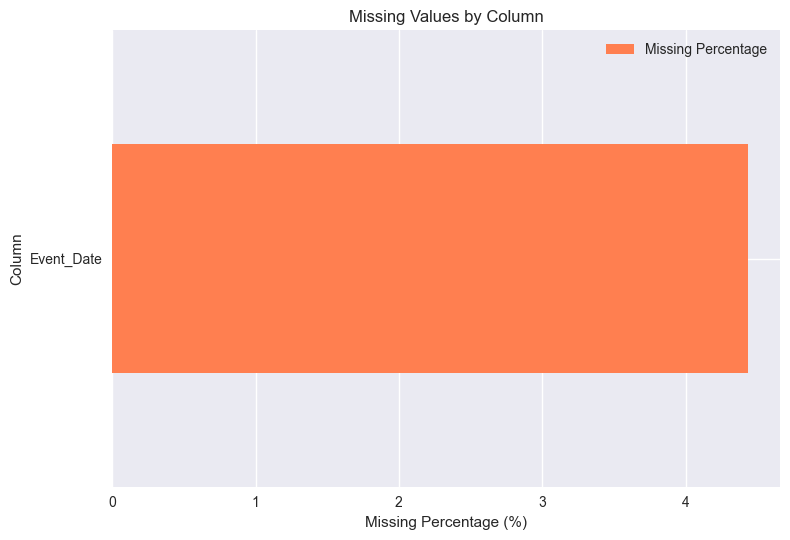

In [23]:
# Missing values analysis
print("=" * 70)
print("🔍 MISSING VALUES ANALYSIS")
print("=" * 70)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Missing Percentage': missing_pct.values
}).sort_values('Missing Count', ascending=False)

print(missing_df.to_string(index=False))

# Visualize missing values
if missing.sum() > 0:
    plt.figure(figsize=(10, 6))
    missing_df[missing_df['Missing Count'] > 0].plot(
        x='Column', y='Missing Percentage', kind='barh',
        title='Missing Values by Column',
        color='coral'
    )
    plt.xlabel('Missing Percentage (%)')
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("\n✅ No missing values found!")


In [24]:
# Duplicate rows
print("\n" + "=" * 70)
print("🔄 DUPLICATE ANALYSIS")
print("=" * 70)

duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

if duplicates > 0:
    print("\nSample duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))



🔄 DUPLICATE ANALYSIS
Total duplicate rows: 0 (0.00%)


In [33]:
user_counts = df.groupby('customer_id').size()

# Users with only one interaction
single_interaction_users = user_counts[user_counts == 1]
single_interaction_users

customer_id
2           1
49          1
57          1
147         1
156         1
           ..
14668621    1
14668799    1
14670497    1
14673872    1
14675204    1
Length: 384428, dtype: int64

## 3. Event Analysis


📊 EVENT DISTRIBUTION
         Event  Count  Percentage
          cart 305129     61.0258
     purchased 166423     33.2846
      wishlist  22179      4.4358
search_keyword   3190      0.6380
        rating   3079      0.6158


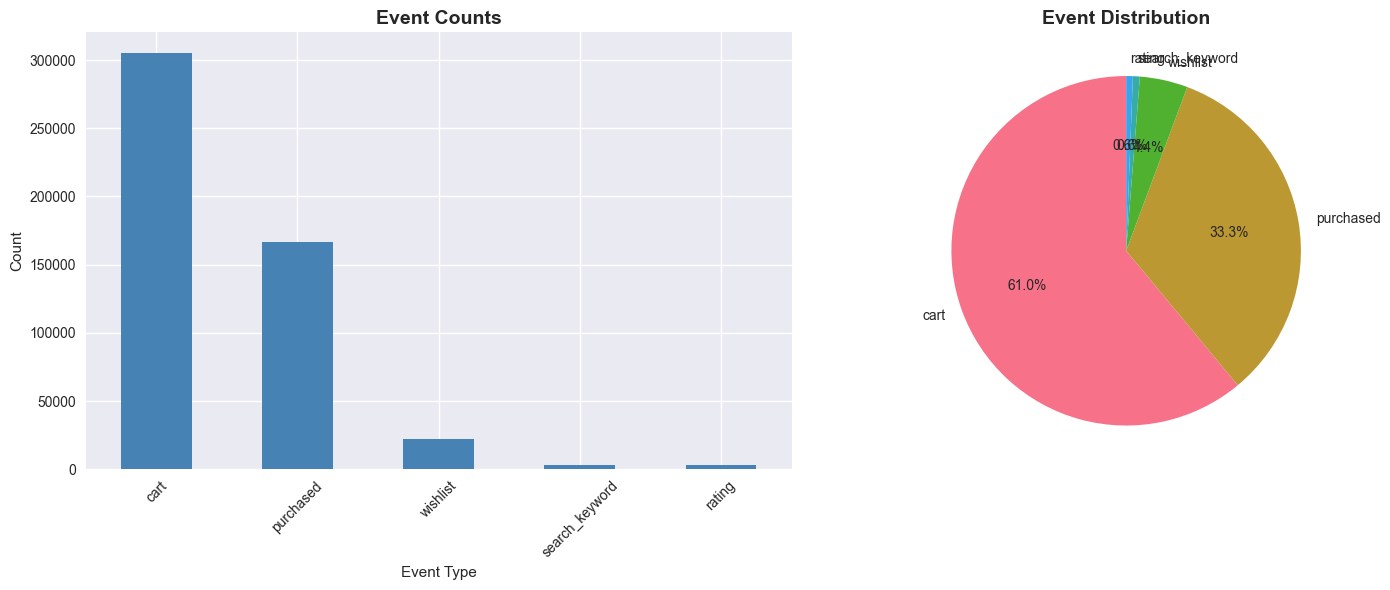

In [25]:
# Normalize column names
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
df['event'] = df['event'].str.lower().str.strip()

# Event distribution
print("=" * 70)
print("📊 EVENT DISTRIBUTION")
print("=" * 70)

event_counts = df['event'].value_counts()
event_pct = (event_counts / len(df)) * 100

event_summary = pd.DataFrame({
    'Event': event_counts.index,
    'Count': event_counts.values,
    'Percentage': event_pct.values
})

print(event_summary.to_string(index=False))

# Visualize event distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
event_counts.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Event Counts', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Event Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
event_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Event Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'event_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


## 4. Temporal Analysis


📅 TEMPORAL ANALYSIS
Date Range: 2022-10-01 00:03:06+00:00 to 2023-03-31 23:59:52+00:00
Total Days: 181
Missing Dates: 22,179 (4.44%)


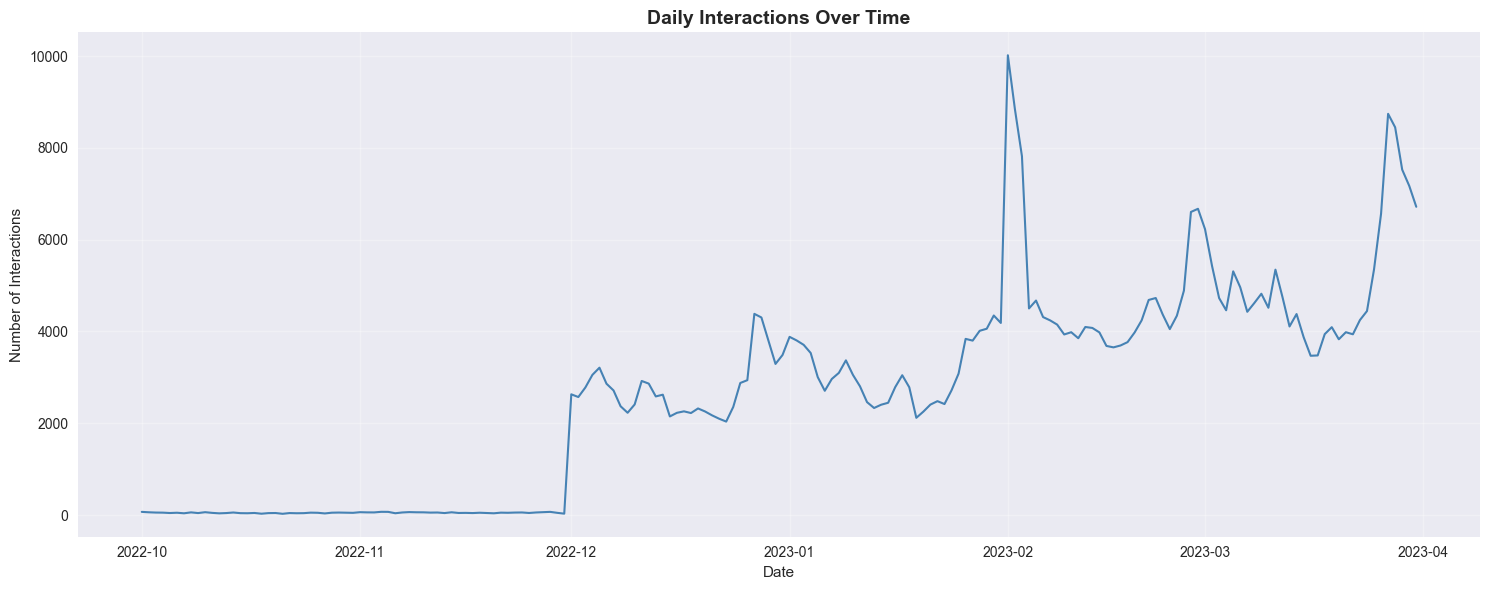

In [26]:
# Convert event_date to datetime
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')

# Date range
print("=" * 70)
print("📅 TEMPORAL ANALYSIS")
print("=" * 70)

print(f"Date Range: {df['event_date'].min()} to {df['event_date'].max()}")
print(f"Total Days: {(df['event_date'].max() - df['event_date'].min()).days}")
print(f"Missing Dates: {df['event_date'].isnull().sum():,} ({df['event_date'].isnull().sum()/len(df)*100:.2f}%)")

# Interactions over time
df['year'] = df['event_date'].dt.year
df['month'] = df['event_date'].dt.month
df['day'] = df['event_date'].dt.day
df['day_of_week'] = df['event_date'].dt.dayofweek
df['hour'] = df['event_date'].dt.hour

# Daily interactions
daily_interactions = df.groupby(df['event_date'].dt.date).size()

plt.figure(figsize=(15, 6))
daily_interactions.plot(kind='line', color='steelblue', linewidth=1.5)
plt.title('Daily Interactions Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Interactions')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'daily_interactions.png', dpi=300, bbox_inches='tight')
plt.show()


🔍 TEMPORAL ANALYSIS

📊 Temporal Overview:
   • Date Range: 2022-10-01 → 2023-03-31
   • Duration: 181 days (6.0 months)
   • Avg interactions/day: 2640

📊 Daily Statistics:
   • Mean: 2625
   • Std: 2222
   • Min day: 28
   • Max day: 10,018

📊 Recency Distribution:
   • Last  7 days: 54,969 interactions (11.5%)
   • Last 14 days: 82,485 interactions (17.3%)
   • Last 30 days: 157,926 interactions (33.1%)
   • Last 60 days: 302,314 interactions (63.3%)
   • Last 90 days: 393,197 interactions (82.3%)


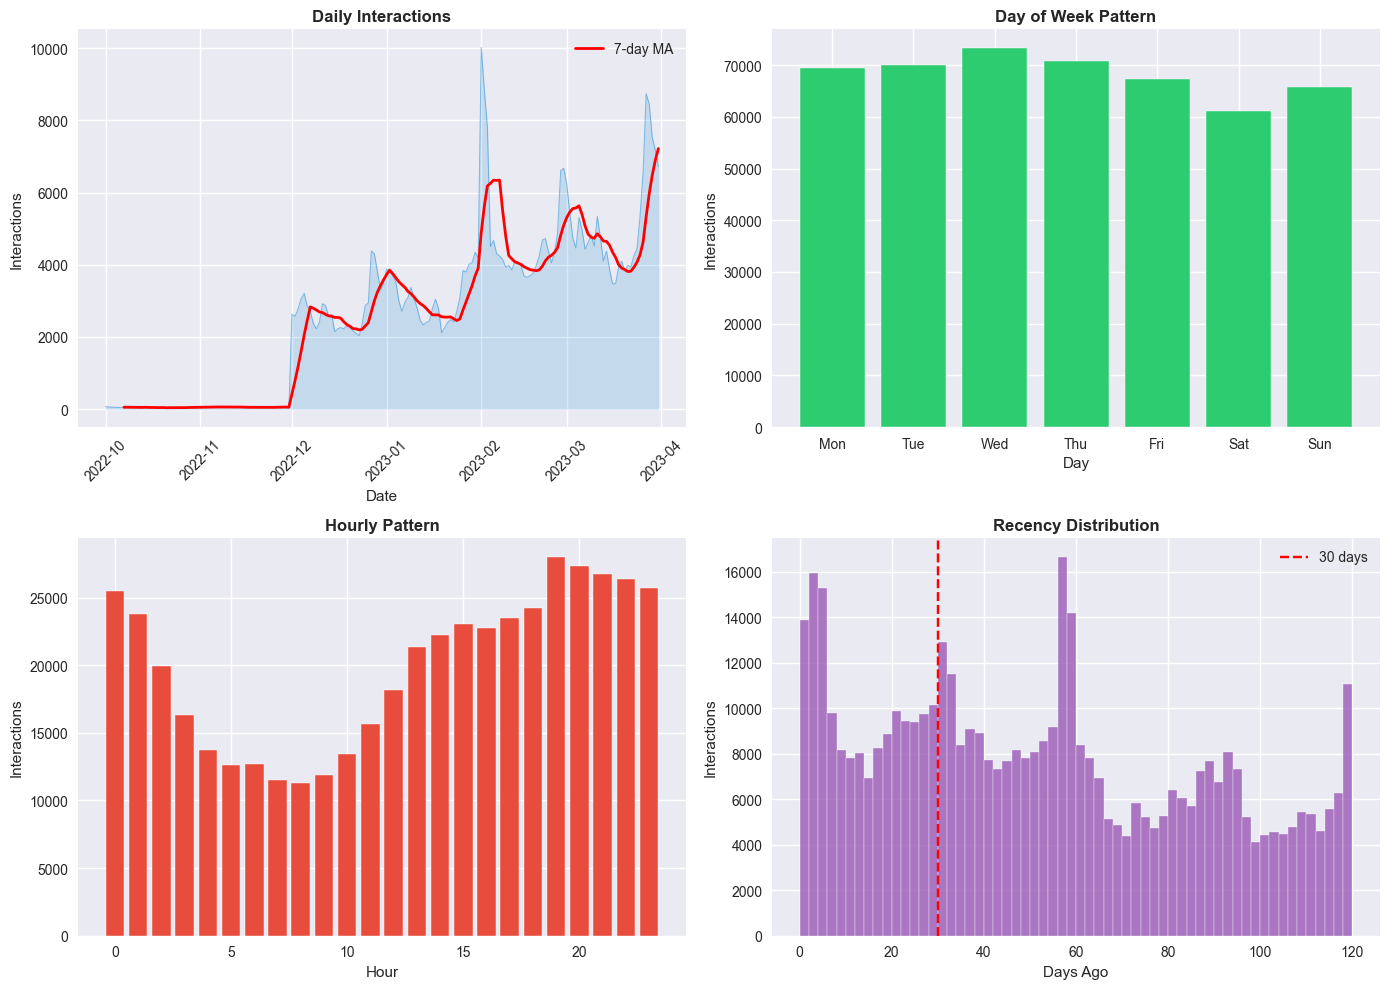


💡 TEMPORAL INSIGHTS
   • 33.1% of interactions in last 30 days
   → Historical patterns are important; balance recency with history


In [38]:
# ============================================================
# CELL: TEMPORAL ANALYSIS (Simplified)
# ============================================================
import matplotlib.pyplot as plt
import pandas as pd

print("=" * 70)
print("🔍 TEMPORAL ANALYSIS")
print("=" * 70)

# Ensure event_date is datetime
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')
df = df.dropna(subset=['event_date'])

# Date range and interactions
date_min, date_max = df['event_date'].min(), df['event_date'].max()
date_range_days = (date_max - date_min).days
avg_per_day = len(df) / max(date_range_days, 1)

print(f"\n📊 Temporal Overview:")
print(f"   • Date Range: {date_min.date()} → {date_max.date()}")
print(f"   • Duration: {date_range_days} days ({date_range_days/30:.1f} months)")
print(f"   • Avg interactions/day: {avg_per_day:.0f}")

# Daily trend
daily_counts = df.groupby(df['event_date'].dt.date).size()

print(f"\n📊 Daily Statistics:")
print(f"   • Mean: {daily_counts.mean():.0f}")
print(f"   • Std: {daily_counts.std():.0f}")
print(f"   • Min day: {daily_counts.min()}")
print(f"   • Max day: {daily_counts.max():,}")

# Recency (days since last interaction)
reference_date = df['event_date'].max()
df['days_ago'] = (reference_date - df['event_date']).dt.days

print(f"\n📊 Recency Distribution:")
for days in [7, 14, 30, 60, 90]:
    count = (df['days_ago'] <= days).sum()
    pct = count / len(df) * 100
    print(f"   • Last {days:2d} days: {count:,} interactions ({pct:.1f}%)")

# ====== PLOTS ======
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Daily interactions with 7-day rolling average
axes[0, 0].plot(daily_counts.index, daily_counts.values, color='#3498db', alpha=0.6, linewidth=0.7)
axes[0, 0].fill_between(daily_counts.index, daily_counts.values, alpha=0.2, color='#3498db')
rolling_avg = daily_counts.rolling(7).mean()
axes[0, 0].plot(rolling_avg.index, rolling_avg.values, color='red', linewidth=2, label='7-day MA')
axes[0, 0].set_title('Daily Interactions', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Interactions')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Day of week pattern
dow_counts = df.groupby('day_of_week').size()
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_idx = [int(i) for i in dow_counts.index]
axes[0, 1].bar([day_names[i] for i in dow_idx], dow_counts.values, color='#2ecc71', edgecolor='white')
axes[0, 1].set_title('Day of Week Pattern', fontweight='bold')
axes[0, 1].set_xlabel('Day')
axes[0, 1].set_ylabel('Interactions')

# 3. Hourly pattern
hour_counts = df.groupby('hour').size()
axes[1, 0].bar(hour_counts.index, hour_counts.values, color='#e74c3c', edgecolor='white')
axes[1, 0].set_title('Hourly Pattern', fontweight='bold')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Interactions')

# 4. Recency histogram
axes[1, 1].hist(df['days_ago'].clip(upper=120), bins=60, color='#9b59b6', alpha=0.8, edgecolor='white')
axes[1, 1].axvline(30, color='red', linestyle='--', label='30 days')
axes[1, 1].set_title('Recency Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Days Ago')
axes[1, 1].set_ylabel('Interactions')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# ====== INSIGHTS ======
print("\n" + "="*70)
print("💡 TEMPORAL INSIGHTS")
print("="*70)
recent_30_pct = (df['days_ago'] <= 30).sum() / len(df) * 100
print(f"   • {recent_30_pct:.1f}% of interactions in last 30 days")
if recent_30_pct > 50:
    print("   → Recent activity is important; use recency weighting")
else:
    print("   → Historical patterns are important; balance recency with history")


## 5. User Analysis


In [27]:
# User statistics
print("=" * 70)
print("👥 USER ANALYSIS")
print("=" * 70)

user_stats = df.groupby('customer_id').agg({
    'product_id': 'count',
    'event': lambda x: x.nunique(),
    'event_date': ['min', 'max']
}).reset_index()

user_stats.columns = ['customer_id', 'total_interactions', 'unique_events', 'first_interaction', 'last_interaction']
user_stats['user_lifetime_days'] = (user_stats['last_interaction'] - user_stats['first_interaction']).dt.days

print(f"\nTotal Unique Users: {df['customer_id'].nunique():,}")
print(f"\nUser Interaction Statistics:")
print(user_stats['total_interactions'].describe())

# User segmentation
warm_users = user_stats[user_stats['total_interactions'] >= 2]
cold_users = user_stats[user_stats['total_interactions'] == 1]

print(f"\n📊 User Segmentation:")
print(f"   Warm users (2+ interactions): {len(warm_users):,} ({len(warm_users)/len(user_stats)*100:.1f}%)")
print(f"   Cold users (1 interaction): {len(cold_users):,} ({len(cold_users)/len(user_stats)*100:.1f}%)")


👥 USER ANALYSIS

Total Unique Users: 433,787

User Interaction Statistics:
count    433787.000000
mean          1.152639
std           0.540163
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          39.000000
Name: total_interactions, dtype: float64

📊 User Segmentation:
   Warm users (2+ interactions): 49,359 (11.4%)
   Cold users (1 interaction): 384,428 (88.6%)


🔍 ANALYSIS 3: USER BEHAVIOR PATTERNS

📊 User Activity Statistics:
   • Mean: 1.15 interactions/user
   • Median: 1.00
   • Std: 0.54
   • Min: 1
   • Max: 39
   • 25th percentile: 1
   • 75th percentile: 1
   • 95th percentile: 2

📊 Cold User Analysis (KEY FOR MODEL SELECTION):
   • Users with ≤ 1 interactions: 368,760 (88.8%)
   • Users with ≤ 2 interactions: 405,572 (97.7%)
   • Users with ≤ 3 interactions: 412,254 (99.3%)
   • Users with ≤ 5 interactions: 414,686 (99.8%)
   • Users with ≤10 interactions: 415,232 (100.0%)
   • Users with ≤20 interactions: 415,301 (100.0%)


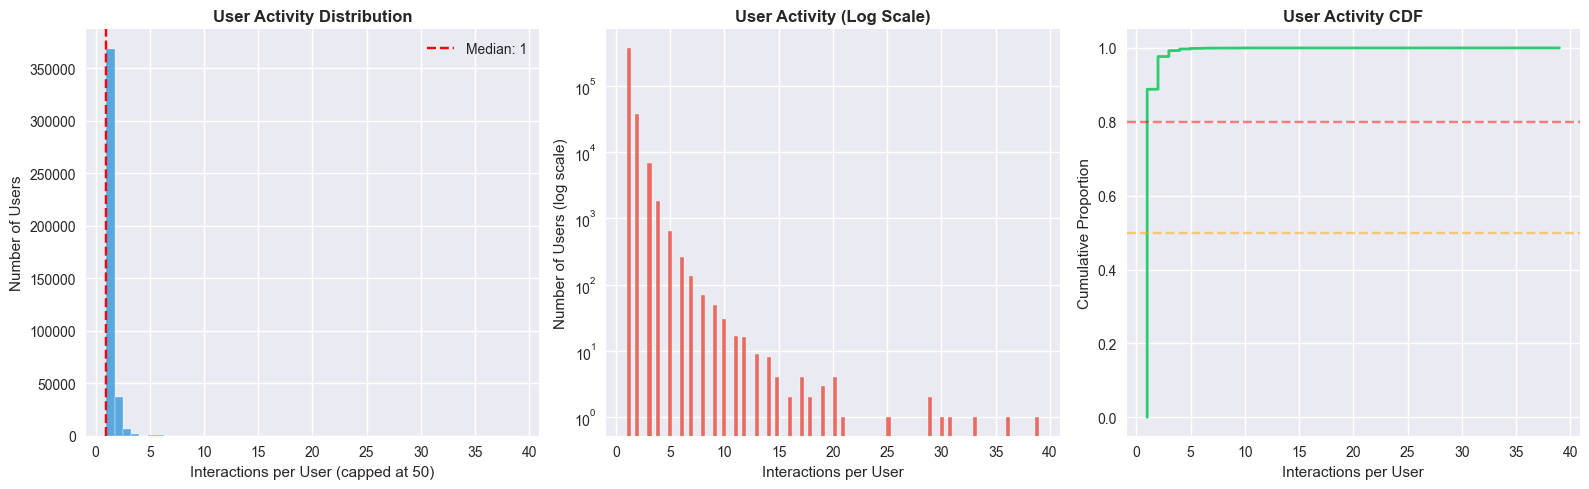

In [40]:
# ============================================================
# CELL 5: USER BEHAVIOR ANALYSIS
# ============================================================
print("=" * 70)
print("🔍 ANALYSIS 3: USER BEHAVIOR PATTERNS")
print("=" * 70)

user_activity = df.groupby('customer_id').size()

print(f"\n📊 User Activity Statistics:")
print(f"   • Mean: {user_activity.mean():.2f} interactions/user")
print(f"   • Median: {user_activity.median():.2f}")
print(f"   • Std: {user_activity.std():.2f}")
print(f"   • Min: {user_activity.min()}")
print(f"   • Max: {user_activity.max():,}")
print(f"   • 25th percentile: {user_activity.quantile(0.25):.0f}")
print(f"   • 75th percentile: {user_activity.quantile(0.75):.0f}")
print(f"   • 95th percentile: {user_activity.quantile(0.95):.0f}")

# Cold user analysis (CRITICAL)
print(f"\n📊 Cold User Analysis (KEY FOR MODEL SELECTION):")
thresholds = [1, 2, 3, 5, 10, 20]
for t in thresholds:
    count = (user_activity <= t).sum()
    pct = count / len(user_activity) * 100
    print(f"   • Users with ≤{t:2d} interactions: {count:,} ({pct:.1f}%)")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Distribution (capped for visibility)
axes[0].hist(user_activity.clip(upper=50), bins=50, color='#3498db', edgecolor='white', alpha=0.8)
axes[0].set_xlabel('Interactions per User (capped at 50)')
axes[0].set_ylabel('Number of Users')
axes[0].set_title('User Activity Distribution', fontweight='bold')
axes[0].axvline(user_activity.median(), color='red', linestyle='--', label=f'Median: {user_activity.median():.0f}')
axes[0].legend()

# Log-scale distribution
axes[1].hist(user_activity, bins=100, color='#e74c3c', edgecolor='white', alpha=0.8)
axes[1].set_xlabel('Interactions per User')
axes[1].set_ylabel('Number of Users (log scale)')
axes[1].set_title('User Activity (Log Scale)', fontweight='bold')
axes[1].set_yscale('log')

# CDF
sorted_activity = np.sort(user_activity.values)
cdf = np.arange(1, len(sorted_activity) + 1) / len(sorted_activity)
axes[2].plot(sorted_activity, cdf, color='#2ecc71', linewidth=2)
axes[2].set_xlabel('Interactions per User')
axes[2].set_ylabel('Cumulative Proportion')
axes[2].set_title('User Activity CDF', fontweight='bold')
axes[2].axhline(0.8, color='red', linestyle='--', alpha=0.5)
axes[2].axhline(0.5, color='orange', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()




# Power law test
print("\n" + "="*70)
print("💡 USER BEHAVIOR INSIGHTS:")
print("="*70)
one_interaction_pct = (user_activity == 1).sum() / len(user_activity) * 100
if one_interaction_pct > 70:
    print(f"   ⚠️ {one_interaction_pct:.1f}% users have ONLY 1 interaction!")
    print("   → These users CANNOT be learned by CF - filter them out")
    print("   → Or use popularity fallback for cold users")
elif one_interaction_pct > 50:
    print(f"   ⚠️ {one_interaction_pct:.1f}% users have only 1 interaction")
    print("   → Consider filtering or using hybrid approach")
else:
    print(f"   ✅ Only {one_interaction_pct:.1f}% single-interaction users")

In [41]:
# Power law test
print("\n" + "="*70)
print("💡 USER BEHAVIOR INSIGHTS:")
print("="*70)
one_interaction_pct = (user_activity == 1).sum() / len(user_activity) * 100
if one_interaction_pct > 70:
    print(f"   ⚠️ {one_interaction_pct:.1f}% users have ONLY 1 interaction!")
    print("   → These users CANNOT be learned by CF - filter them out")
    print("   → Or use popularity fallback for cold users")
elif one_interaction_pct > 50:
    print(f"   ⚠️ {one_interaction_pct:.1f}% users have only 1 interaction")
    print("   → Consider filtering or using hybrid approach")
else:
    print(f"   ✅ Only {one_interaction_pct:.1f}% single-interaction users")


💡 USER BEHAVIOR INSIGHTS:
   ⚠️ 88.8% users have ONLY 1 interaction!
   → These users CANNOT be learned by CF - filter them out
   → Or use popularity fallback for cold users


🔍 ANALYSIS 7: CO-OCCURRENCE PATTERNS (CF Feasibility)

📊 Products per User:
   • Mean: 1.14
   • Median: 1.00
   • Max: 36

📊 Users per Product:
   • Mean: 2.50
   • Median: 1.00
   • Max: 2532

📊 Co-occurrence Analysis (sampled):
   • Products with 2+ users: 57,870 (30.5%)
   ⚠️ No shared users found between sampled product pairs!


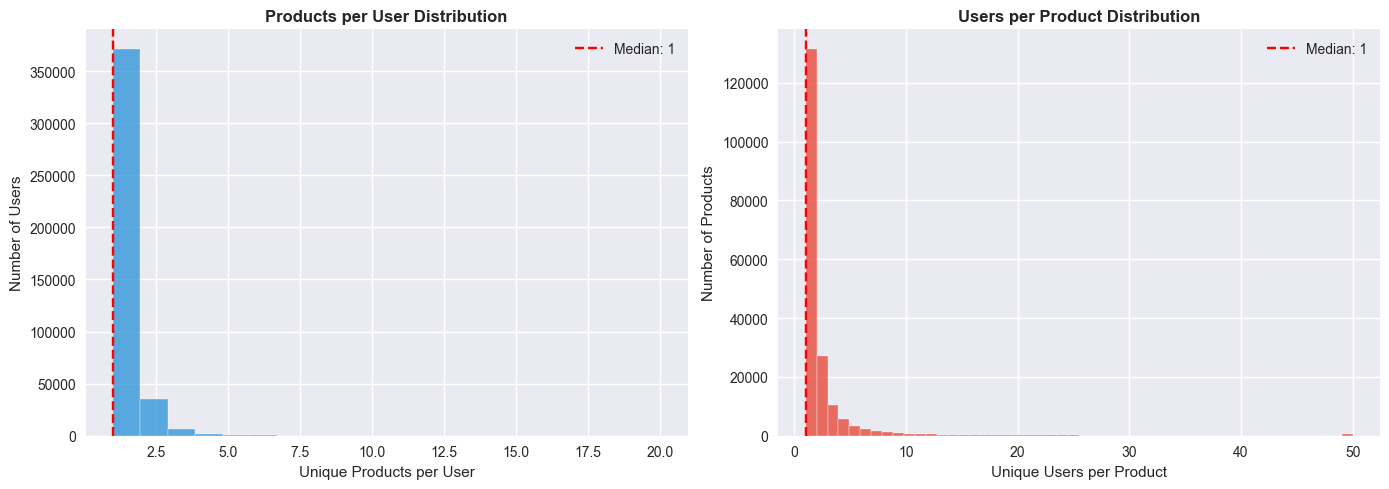


💡 CO-OCCURRENCE INSIGHTS:
   ⚠️ 89.5% users interact with ONLY 1 product!
   → User-based CF will fail - these users have no cross-product signal
   → Consider: Product-based recommendations, Popularity, Content-based


In [39]:
# ============================================================
# CELL 9: CO-OCCURRENCE ANALYSIS (CF Feasibility Check)
# ============================================================
# This is CRITICAL - if products don't share users, CF won't work!

print("=" * 70)
print("🔍 ANALYSIS 7: CO-OCCURRENCE PATTERNS (CF Feasibility)")
print("=" * 70)

# How many products does each user interact with?
user_product_counts = df.groupby('customer_id')['product_id'].nunique()

print(f"\n📊 Products per User:")
print(f"   • Mean: {user_product_counts.mean():.2f}")
print(f"   • Median: {user_product_counts.median():.2f}")
print(f"   • Max: {user_product_counts.max()}")

# How many users does each product have?
product_user_counts = df.groupby('product_id')['customer_id'].nunique()

print(f"\n📊 Users per Product:")
print(f"   • Mean: {product_user_counts.mean():.2f}")
print(f"   • Median: {product_user_counts.median():.2f}")
print(f"   • Max: {product_user_counts.max()}")

# Sample co-occurrence check (expensive for full data)
print("\n📊 Co-occurrence Analysis (sampled):")

# Get products with 2+ users
products_with_users = product_user_counts[product_user_counts >= 2]
print(f"   • Products with 2+ users: {len(products_with_users):,} ({len(products_with_users)/len(product_user_counts)*100:.1f}%)")

# Sample some products and check user overlap
if len(products_with_users) > 100:
    sample_products = np.random.choice(products_with_users.index, min(100, len(products_with_users)), replace=False)
else:
    sample_products = products_with_users.index.tolist()

# Build product -> users mapping for sampled products
product_users = df[df['product_id'].isin(sample_products)].groupby('product_id')['customer_id'].apply(set)

# Check overlap between product pairs
overlaps = []
products_list = list(product_users.keys())
for i in range(min(50, len(products_list))):
    for j in range(i+1, min(50, len(products_list))):
        p1, p2 = products_list[i], products_list[j]
        overlap = len(product_users[p1] & product_users[p2])
        if overlap > 0:
            overlaps.append(overlap)

if overlaps:
    print(f"   • Product pairs with shared users: {len(overlaps)} (of sampled pairs)")
    print(f"   • Avg users in common: {np.mean(overlaps):.2f}")
    print(f"   • Max users in common: {max(overlaps)}")
else:
    print(f"   ⚠️ No shared users found between sampled product pairs!")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(user_product_counts.clip(upper=20), bins=20, color='#3498db', edgecolor='white', alpha=0.8)
axes[0].set_xlabel('Unique Products per User')
axes[0].set_ylabel('Number of Users')
axes[0].set_title('Products per User Distribution', fontweight='bold')
axes[0].axvline(user_product_counts.median(), color='red', linestyle='--', label=f'Median: {user_product_counts.median():.0f}')
axes[0].legend()

axes[1].hist(product_user_counts.clip(upper=50), bins=50, color='#e74c3c', edgecolor='white', alpha=0.8)
axes[1].set_xlabel('Unique Users per Product')
axes[1].set_ylabel('Number of Products')
axes[1].set_title('Users per Product Distribution', fontweight='bold')
axes[1].axvline(product_user_counts.median(), color='red', linestyle='--', label=f'Median: {product_user_counts.median():.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("💡 CO-OCCURRENCE INSIGHTS:")
print("="*70)

single_product_users = (user_product_counts == 1).sum()
single_product_users_pct = single_product_users / len(user_product_counts) * 100

if single_product_users_pct > 80:
    print(f"   ⚠️ {single_product_users_pct:.1f}% users interact with ONLY 1 product!")
    print("   → User-based CF will fail - these users have no cross-product signal")
    print("   → Consider: Product-based recommendations, Popularity, Content-based")
elif single_product_users_pct > 50:
    print(f"   ⚠️ {single_product_users_pct:.1f}% users interact with only 1 product")
    print("   → CF needs filtering of cold users")
else:
    print(f"   ✅ Only {single_product_users_pct:.1f}% single-product users - CF viable")


## 6. Product Analysis


In [34]:
# Product statistics
print("=" * 70)
print("🛍️  PRODUCT ANALYSIS")
print("=" * 70)

product_stats = df.groupby('product_id').agg({
    'customer_id': ['count', 'nunique'],
    'event': lambda x: x.nunique(),
    'event_date': ['min', 'max']
}).reset_index()

product_stats.columns = ['product_id', 'total_interactions', 'unique_users', 'unique_events', 'first_interaction', 'last_interaction']

print(f"\nTotal Unique Products: {df['product_id'].nunique():,}")
print(f"\nProduct Interaction Statistics:")
print(product_stats['total_interactions'].describe())

# Popular products
top_products = product_stats.nlargest(20, 'total_interactions')
print(f"\n📊 Top 10 Most Popular Products:")
print(top_products[['product_id', 'total_interactions', 'unique_users']].head(10).to_string(index=False))


🛍️  PRODUCT ANALYSIS

Total Unique Products: 200,325

Product Interaction Statistics:
count    200325.000000
mean          2.495944
std          13.580165
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2556.000000
Name: total_interactions, dtype: float64

📊 Top 10 Most Popular Products:
 product_id  total_interactions  unique_users
        379                2556          2532
        126                2282          2268
        491                2128          2114
        274                1181          1176
        130                1115          1110
       1862                 846           835
        218                 812           807
        709                 762           749
       1290                 708           704
        565                 688           683


## 7. Summary and Insights


In [29]:
# Generate summary report
print("=" * 70)
print("📋 EDA SUMMARY REPORT")
print("=" * 70)

# Calculate sparsity
n_users = df['customer_id'].nunique()
n_products = df['product_id'].nunique()
n_interactions = len(df)
total_possible = n_users * n_products
sparsity = (1 - (n_interactions / total_possible)) * 100

summary = {
    'Dataset Size': f"{df.shape[0]:,} rows × {df.shape[1]} columns",
    'Total Users': f"{n_users:,}",
    'Total Products': f"{n_products:,}",
    'Total Interactions': f"{n_interactions:,}",
    'Date Range': f"{df['event_date'].min()} to {df['event_date'].max()}",
    'Missing Values': f"{df.isnull().sum().sum():,} ({df.isnull().sum().sum()/len(df)*100:.2f}%)",
    'Sparsity': f"{sparsity:.2f}%",
    'Warm Users': f"{len(warm_users):,} ({len(warm_users)/len(user_stats)*100:.1f}%)",
    'Cold Users': f"{len(cold_users):,} ({len(cold_users)/len(user_stats)*100:.1f}%)",
    'Unique Events': f"{df['event'].nunique()}",
    'Event Types': list(df['event'].unique())
}

for key, value in summary.items():
    print(f"\n{key}: {value}")

# Save summary to file
import json
with open(OUTPUT_DIR / 'eda_summary.json', 'w') as f:
    json.dump(summary, f, indent=2, default=str)

print(f"\n\n✅ EDA Summary saved to {OUTPUT_DIR / 'eda_summary.json'}")
print(f"✅ All visualizations saved to {OUTPUT_DIR}")


📋 EDA SUMMARY REPORT

Dataset Size: 500,000 rows × 11 columns

Total Users: 433,787

Total Products: 200,325

Total Interactions: 500,000

Date Range: 2022-10-01 00:03:06+00:00 to 2023-03-31 23:59:52+00:00

Missing Values: 133,074 (26.61%)

Sparsity: 100.00%

Warm Users: 49,359 (11.4%)

Cold Users: 384,428 (88.6%)

Unique Events: 5

Event Types: ['purchased', 'cart', 'wishlist', 'rating', 'search_keyword']


✅ EDA Summary saved to ..\artifacts\eda\eda_summary.json
✅ All visualizations saved to ..\artifacts\eda


In [42]:
# ============================================================
# CELL 11: MODEL RECOMMENDATIONS BASED ON ANALYSIS
# ============================================================
print("=" * 70)
print("🎯 RECOMMENDED APPROACH BASED ON DATA ANALYSIS")
print("=" * 70)

# Count critical challenges
critical_count = sum(1 for _, severity, _ in challenges if severity == "CRITICAL")
high_count = sum(1 for _, severity, _ in challenges if severity == "HIGH")

print("\n" + "="*70)
print("📋 RECOMMENDED STRATEGY:")
print("="*70)

if critical_count >= 2:
    print("""
    🔴 EXTREME CHALLENGES DETECTED - SPECIAL APPROACH NEEDED

    ┌─────────────────────────────────────────────────────────────────┐
    │  RECOMMENDED ARCHITECTURE: HYBRID WITH FALLBACK CHAIN          │
    └─────────────────────────────────────────────────────────────────┘

    STEP 1: DATA FILTERING (MANDATORY)
    ─────────────────────────────────
    • Filter users with < 2 interactions
    • Filter products with < 2 interactions
    • This creates a "core" dataset for CF

    STEP 2: BUILD FALLBACK CHAIN
    ─────────────────────────────
    For each product, try in order:

    1. [If enough data] Collaborative Filtering (ALS/BPR)
       └─ For products with 5+ users in filtered data

    2. [Fallback] Popularity-Based
       └─ Recommend users who engage with similar popular products

    3. [Last resort] Global Top Users
       └─ Users with highest overall engagement scores

    STEP 3: SCORING FORMULA
    ───────────────────────
    final_score = α × CF_score + β × popularity_score + γ × recency_score

    Where:
    • α = 0.4 (CF component)
    • β = 0.4 (Popularity component - IMPORTANT due to long-tail)
    • γ = 0.2 (Recency component)

    STEP 4: EVALUATION STRATEGY
    ───────────────────────────
    • Only evaluate on products with test data
    • Ensure train/test user overlap
    • Use popularity as baseline (MUST BEAT THIS!)
    """)

elif critical_count >= 1 or high_count >= 2:
    print("""
    🟡 SIGNIFICANT CHALLENGES - MODIFIED CF APPROACH

    RECOMMENDED: Hybrid CF + Popularity with Filtering

    1. Filter cold users/products (< 3 interactions)
    2. Use ALS with high regularization (0.1-0.5)
    3. Blend with popularity baseline
    4. Add recency weighting
    """)
else:
    print("""
    🟢 MANAGEABLE CHALLENGES - STANDARD CF SHOULD WORK

    RECOMMENDED: Matrix Factorization (ALS or BPR)

    1. Standard preprocessing
    2. ALS or BPR with default parameters
    3. Evaluate and tune
    """)

print("\n" + "="*70)
print("📊 SPECIFIC MODEL RECOMMENDATIONS:")
print("="*70)

print("""
    ┌───────────────────┬─────────────────────────────────────────────┐
    │ Model             │ When to Use                                 │
    ├───────────────────┼─────────────────────────────────────────────┤
    │ Popularity        │ ALWAYS as baseline (often beats CF!)        │
    │ ALS               │ After filtering, high regularization        │
    │ BPR               │ Better for ranking than ALS                 │
    │ LightFM           │ Can add user/item features                  │
    │ Item-KNN          │ Simpler, works for finding similar products │
    │ User-KNN          │ Good if users share many products           │
    │ Neural CF         │ Only if you have GPU and enough data        │
    └───────────────────┴─────────────────────────────────────────────┘
""")

print("\n" + "="*70)
print("🚀 NEXT STEPS:")
print("="*70)
print("""
    1. Run the modeling notebook with filtered data
    2. Start with POPULARITY BASELINE first
    3. Compare all models against popularity
    4. Use ensemble/hybrid if single model fails
    5. Make sure evaluation uses same filtered data
""")


🎯 RECOMMENDED APPROACH BASED ON DATA ANALYSIS


NameError: name 'challenges' is not defined